In [ ]:
sns.lineplot()

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl

In [2]:
employment = pd.read_excel("Datasets/unemployment.xlsx")
employment.head(10)

,Age,Gender,Period,Unemployed
0,16 to 19 years,Men,2005-01-01,91000
1,20 to 24 years,Men,2005-01-01,175000
2,25 to 34 years,Men,2005-01-01,194000
3,35 to 44 years,Men,2005-01-01,201000
4,45 to 54 years,Men,2005-01-01,207000
5,55 to 64 years,Men,2005-01-01,101000
6,65 years and over,Men,2005-01-01,33000
7,16 to 19 years,Women,2005-01-01,38000
8,20 to 24 years,Women,2005-01-01,90000
9,25 to 34 years,Women,2005-01-01,142000


# Line Charts

In [3]:
col1 = np.linspace(0, 10, 1000)
col2 = np.sin(col1)
df = pd.DataFrame({"C1" : col1 , "C2" :col2})
df.head(10)

,C1,C2
0,0.00000,0.000000
1,0.01001,0.010010
2,0.02002,0.020019
3,0.03003,0.030026
4,0.04004,0.040029
5,0.05005,0.050029
6,0.06006,0.060024
7,0.07007,0.070013
8,0.08008,0.079995
9,0.09009,0.089968


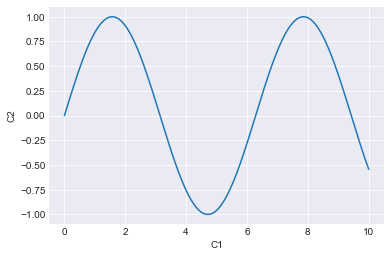

In [4]:
# Plotting lineplot using sns.lineplot()
plt.style.use('seaborn-darkgrid')
%matplotlib inline 
sns.lineplot(x=df.C1,y=df.C2,data=df)
plt.show()

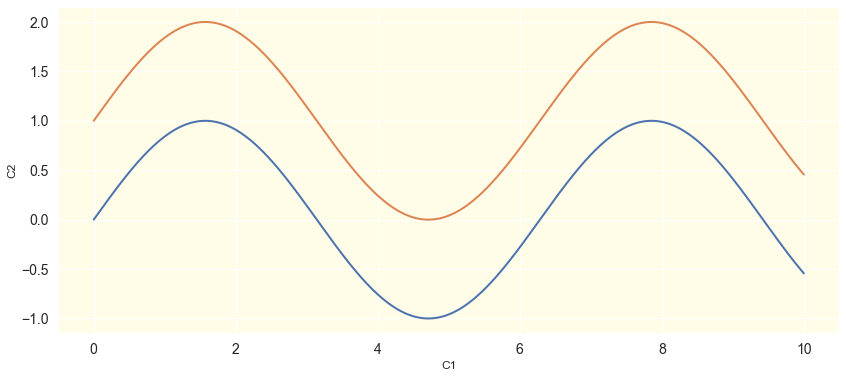

In [5]:
"""  - Adjusting background color using axes.facecolor
     - Changing label size using xtick.labelsize , ytick.labelsize """

plt.figure(figsize=(14,6))
sns.set(rc={"axes.facecolor":"#FFFDE7", "axes.grid":True,'xtick.labelsize':14,'ytick.labelsize':14})
sns.lineplot(x=df.C1,y=df.C2,data=df , linewidth = 2)
sns.lineplot(x=df.C1,y=df.C2+1,data=df , linewidth = 2)
plt.show()

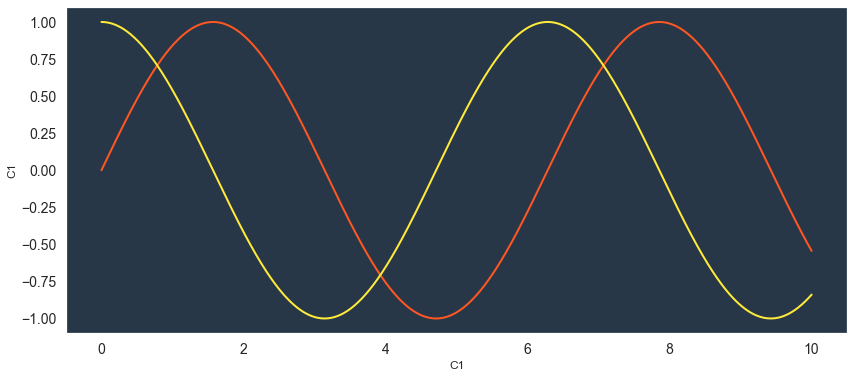

In [6]:
"""  - Adjusting background color using axes.facecolor
     - Changing label size using xtick.labelsize , ytick.labelsize """

plt.figure(figsize=(14,6))
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False,'xtick.labelsize':14,'ytick.labelsize':14})
sns.lineplot(x=df.C1,y=df.C2,data=df , color = "#FF5722" , linewidth = 2 )
sns.lineplot(x=df.C1,y=np.cos(df.C1),data=df , color = "#FFEB3B" , linewidth = 2)
plt.show()

In [7]:
# Recover default matplotlib settings
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
spotify = pd.read_csv("Datasets/spotify.csv" , index_col="Date")

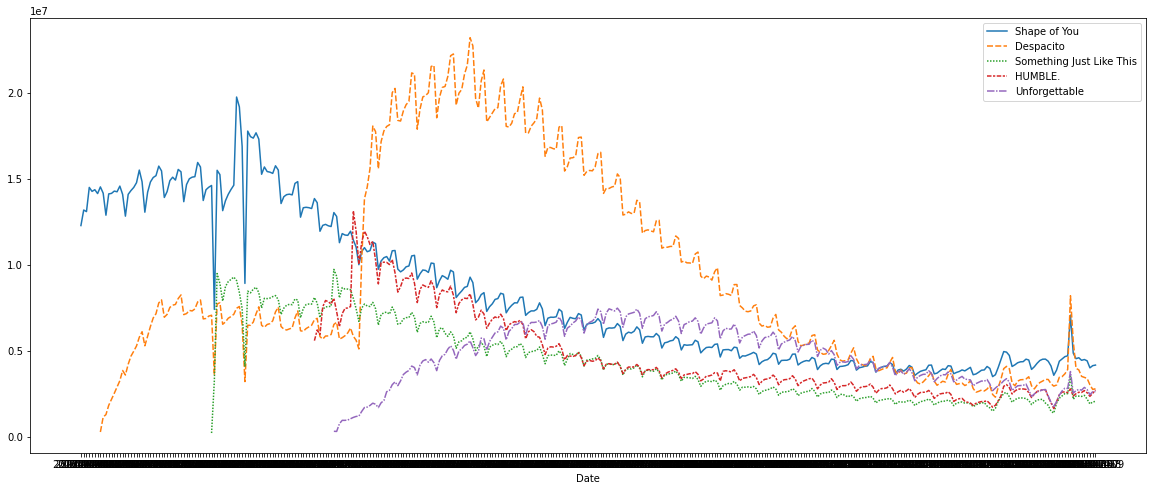

In [11]:
plt.figure(figsize=(20,8))
sns.lineplot(data=spotify)
plt.show()

Look at the X-Asis. It is clealy not able to interpret the Index as Date. So the next step will be to convert the Index to Datetime.

In [12]:
spotify.index = pd.to_datetime(spotify.index) # Converting datatype of index to Datetime

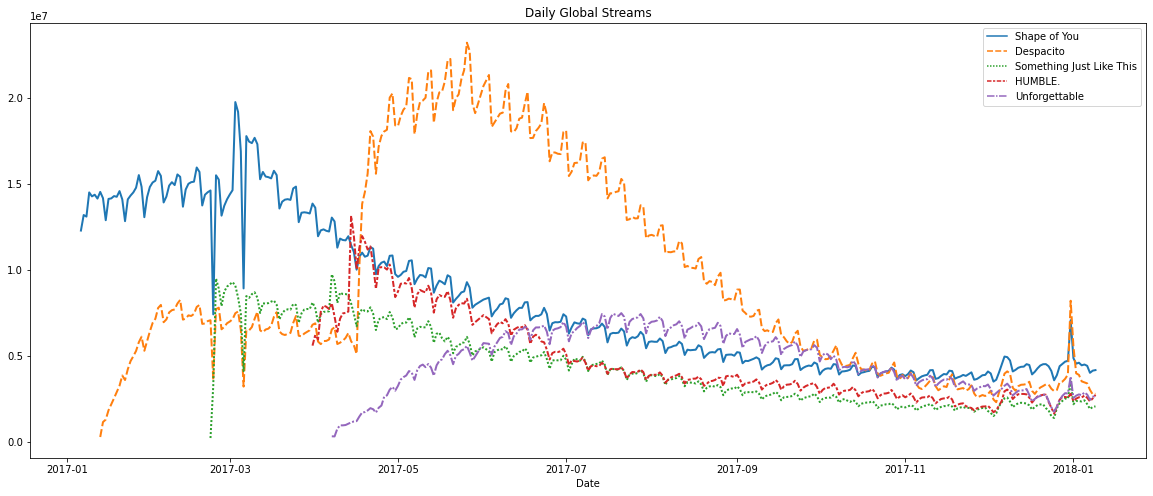

In [13]:
plt.figure(figsize=(20,8))
sns.lineplot(data=spotify,linewidth = 2)
plt.title("Daily Global Streams")
plt.show()

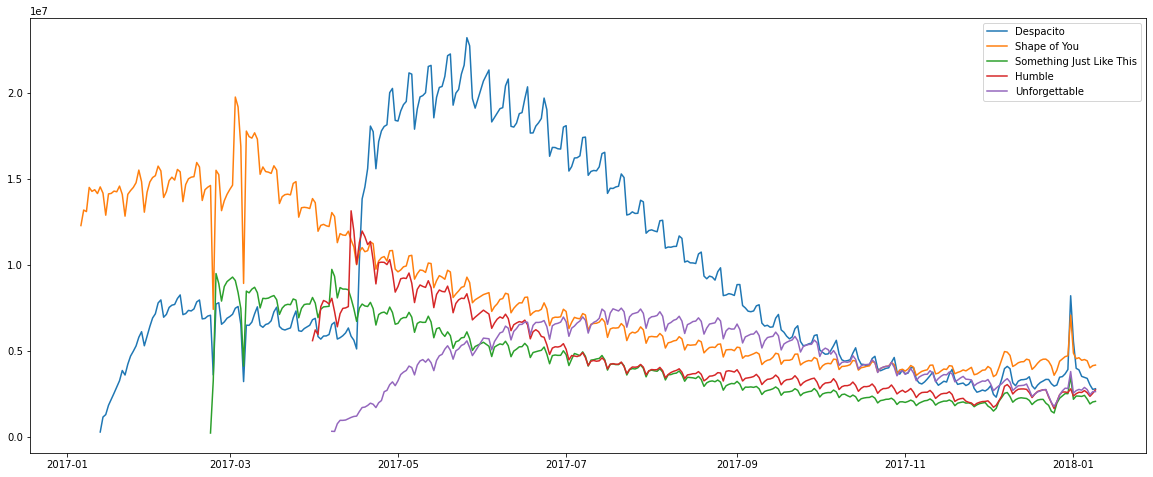

In [14]:
# Using Matplotlib for same visualization
import matplotlib as mpl
plt.figure(figsize=(20,8))
plt.plot(spotify['Despacito'] , label="Despacito")
plt.plot(spotify['Shape of You'] , label="Shape of You")
plt.plot(spotify['Something Just Like This'] , label="Something Just Like This")
plt.plot(spotify['HUMBLE.'] , label="Humble")
plt.plot(spotify['Unforgettable'] , label="Unforgettable")
plt.legend()
plt.show()

So we can see using Seabon we can save many lines of code.

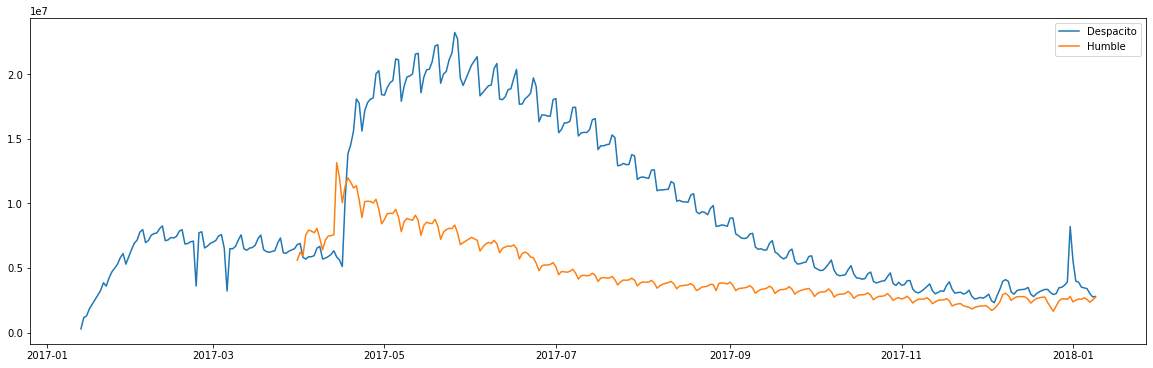

In [15]:
plt.figure(figsize=(20,6))
sns.lineplot(data=spotify['Despacito'],linewidth = 1.5 , label = 'Despacito')
sns.lineplot(data=spotify['HUMBLE.'],linewidth = 1.5 , label = 'Humble')
plt.show()

In [16]:
canada = pd.read_csv("Datasets/canada.csv")
canada.drop(columns=['AREA' , 'DEV', 'DevName' , 'REG', 'Type', 'Coverage' , 'AreaName', 'RegName' ], inplace=True)
canada.rename(columns={'OdName':'Country'} , inplace=True)
canada.set_index(canada.Country,inplace=True)
canada.index.name=None
del canada['Country']
canada = canada.transpose()

In [17]:
canada.head()

,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe,Unknown,Total
1980,16,1,80,0,0,1,0,368,0,702,...,0,0,103,1191,0,1,11,72,44000,143137
1981,39,0,67,1,0,3,0,426,0,639,...,0,0,117,1829,0,2,17,114,18078,128641
1982,39,0,71,0,0,6,0,626,0,484,...,0,0,174,2162,0,1,11,102,16904,121175
1983,47,0,69,0,0,6,0,241,0,317,...,0,0,124,3404,0,6,7,44,13635,89185
1984,71,0,63,0,0,4,42,237,0,317,...,0,0,142,7583,0,0,16,32,14855,88272


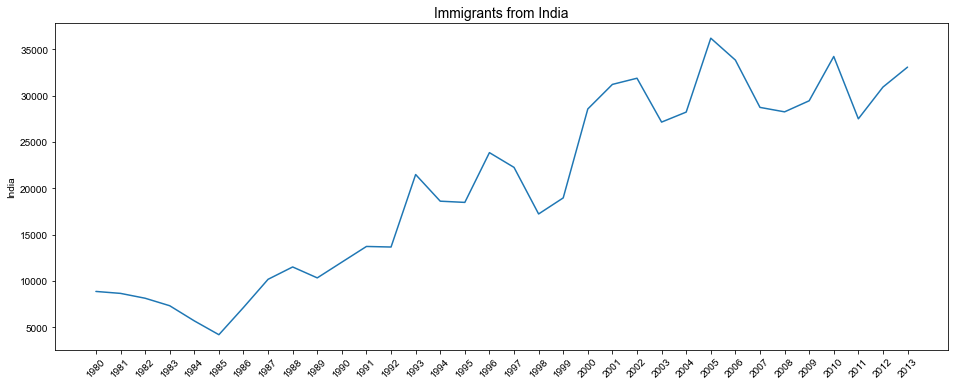

In [18]:
plt.figure(figsize=(16,6))
plt.title("Immigrants from India",fontsize = 14)
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False,'xtick.labelsize':10,'ytick.labelsize':10})
plt.xticks(rotation=45) # Rotating X tickts by 45 degrees
sns.lineplot(x = canada.index.values, y = canada['India'])
plt.show()

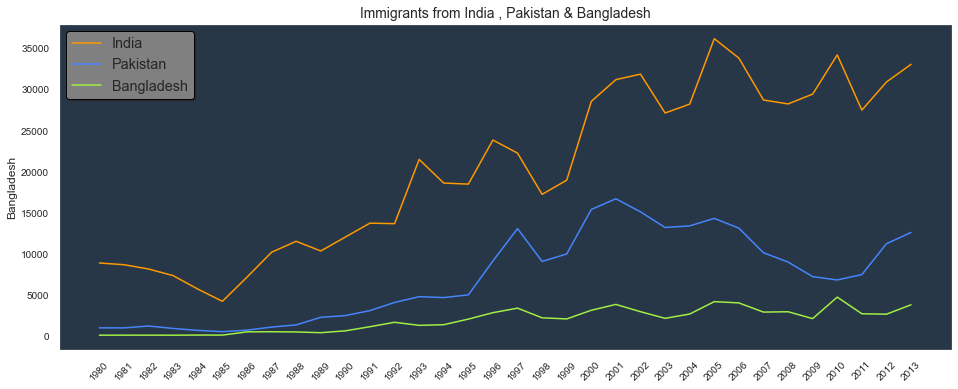

In [19]:
# Plotting multiple sets of data (E.g Immigration data of multiple countries in one plot)
plt.figure(figsize=(16,6))
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False,'xtick.labelsize':10,'ytick.labelsize':10})
plt.title("Immigrants from India , Pakistan & Bangladesh",fontsize = 14)
plt.xticks(rotation=45) # Rotating X tickts by 45 degrees
sns.lineplot(x = canada.index.values, y = canada['India'] , color = '#ff9900' , label= 'India')
sns.lineplot(x = canada.index.values, y = canada['Pakistan'] , color = '#4586ff' , label = 'Pakistan')
sns.lineplot(x = canada.index.values, y = canada['Bangladesh'] , color = '#a2ef44' , label = 'Bangladesh')
plt.legend(facecolor= 'grey' , fontsize='large' , edgecolor = 'black' ,shadow=True) # Legend formatting
plt.show()

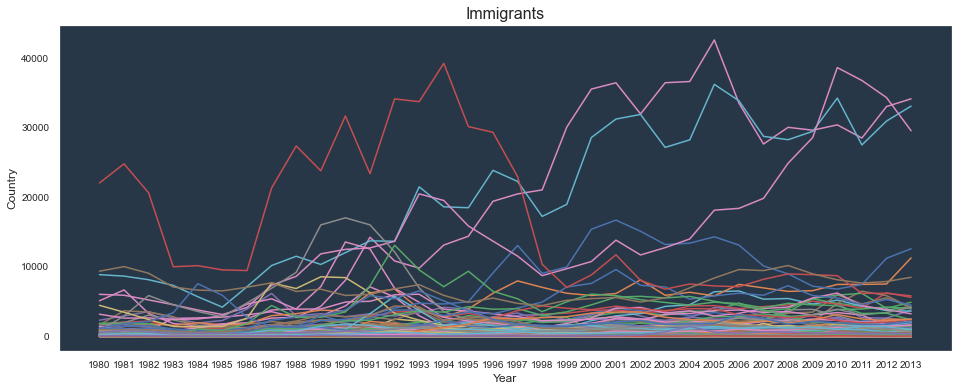

In [20]:
# Plotting multiple sets of data using for loop (E.g Immigration data of multiple countries in one plot)
plt.figure(figsize=(16,6))
plt.title("Immigrants",fontsize = 16)
for i in canada.columns:
    if canada[i].name != 'Total' and canada[i].name != 'Unknown':
        x=canada.index.values
        y=canada[i]
        sns.lineplot(x,y)
plt.xlabel ('Year')
plt.ylabel ('Country')
plt.show()

In [21]:
# Recover default matplotlib settings
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline

In [22]:
employment.head()

,Age,Gender,Period,Unemployed
0,16 to 19 years,Men,2005-01-01,91000
1,20 to 24 years,Men,2005-01-01,175000
2,25 to 34 years,Men,2005-01-01,194000
3,35 to 44 years,Men,2005-01-01,201000
4,45 to 54 years,Men,2005-01-01,207000


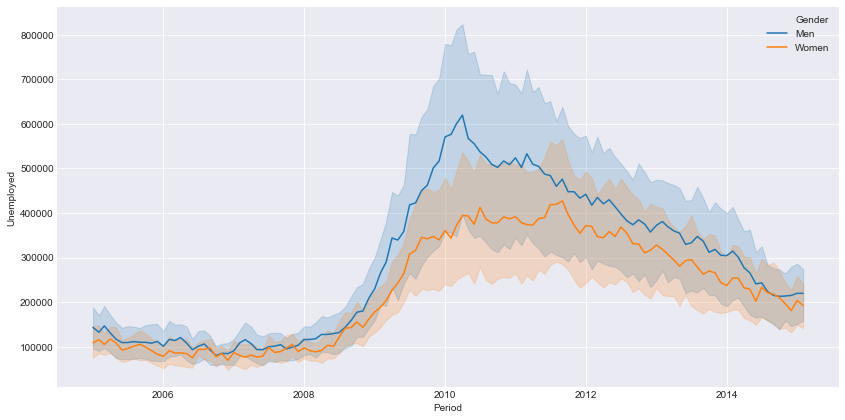

In [23]:
# Show groups with different colors using "hue"
plt.figure(figsize=(14,7))
plt.style.use('seaborn-darkgrid')
# Group variable using "hue" that will produce lines with different colors
sns.lineplot(x="Period" , y="Unemployed" , hue="Gender" , data=employment) 
plt.show()

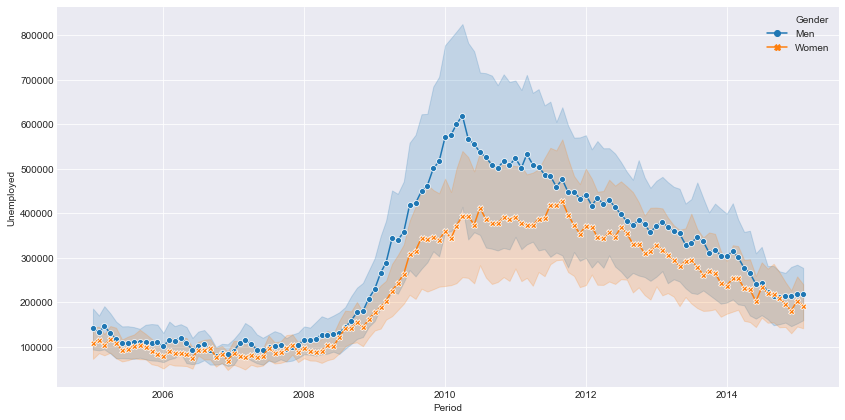

In [24]:
# Using markers to identify groups
plt.figure(figsize=(14,7))
plt.style.use('seaborn-darkgrid')
sns.lineplot(x="Period" , y="Unemployed" , hue = "Gender" ,style="Gender" , markers=True , dashes=False ,data=employment)
plt.show()

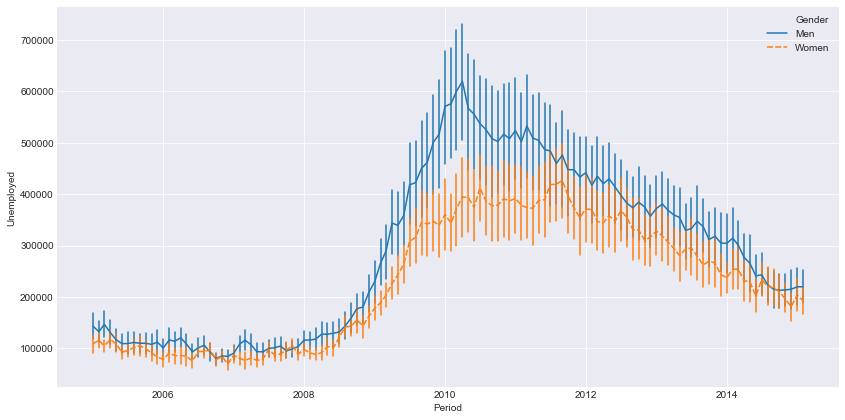

In [25]:
plt.figure(figsize=(14,7))
plt.style.use('seaborn-darkgrid')
sns.lineplot(x="Period" , y="Unemployed" , hue = "Gender" ,style="Gender" ,  err_style="bars", ci=70, data=employment)
plt.show()

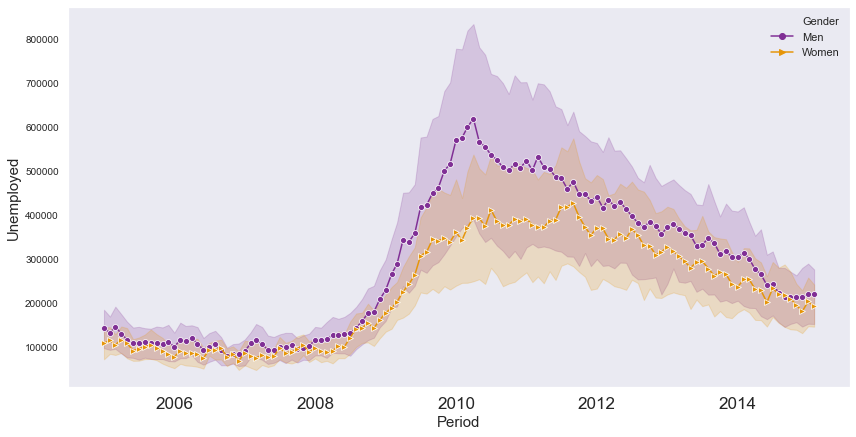

In [26]:
plt.figure(figsize=(14,7))
sns.set(rc={'xtick.labelsize':17,'ytick.labelsize':10,'axes.labelsize':15 , "axes.grid":False})

# Use "Pallete" to specify the colors to be used for different levels of the hue
sns.lineplot(x="Period" , y="Unemployed", data = employment, hue = "Gender",
            style = "Gender", dashes = False, palette = 'CMRmap' , markers = ["o", ">"])

plt.show()

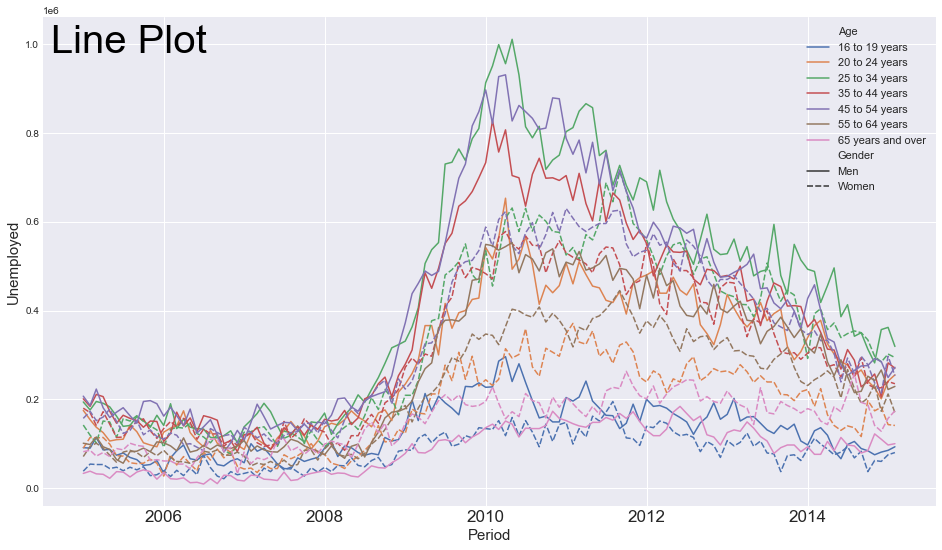

In [27]:
# Color and line dashing to represent 2 different grouping variables using "hue" & "style"
plt.figure(figsize=(16,9))
plt.style.use('seaborn-darkgrid')
plt.gcf().text(.2, .84, "Line Plot", fontsize = 40, color='Black' ,ha='center', va='center')
sns.lineplot(x="Period" , y="Unemployed" , hue="Age" , style="Gender",data=employment)
plt.show()

In [28]:
emp = employment[employment.Period.between('2005-01-01', '2006-01-01' , inclusive = True)]
emp.tail()

,Age,Gender,Period,Unemployed
177,25 to 34 years,Women,2006-01-01,92000
178,35 to 44 years,Women,2006-01-01,134000
179,45 to 54 years,Women,2006-01-01,110000
180,55 to 64 years,Women,2006-01-01,85000
181,65 years and over,Women,2006-01-01,61000


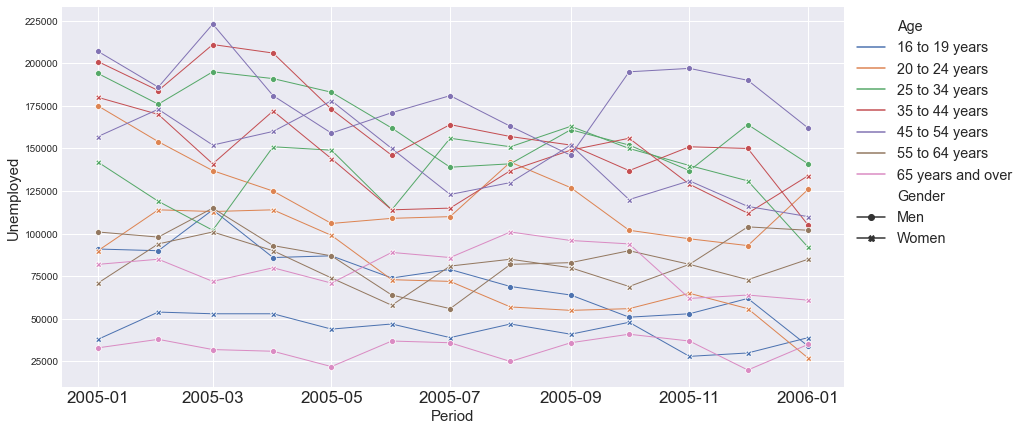

In [29]:
#Showing all experiments instead of Aggregate using "units" and "estimator"
plt.figure(figsize=(14,7))
plt.style.use('seaborn-darkgrid')
sns.lineplot(x="Period" , y="Unemployed" , hue = "Age" ,style="Gender" ,
 units="Age" ,markers=True , dashes=False ,estimator=None, lw=1,data=emp)
plt.legend(bbox_to_anchor=(1.0, 1.0) , shadow=True, fontsize='large')
plt.show()

<Figure size 720x720 with 0 Axes>

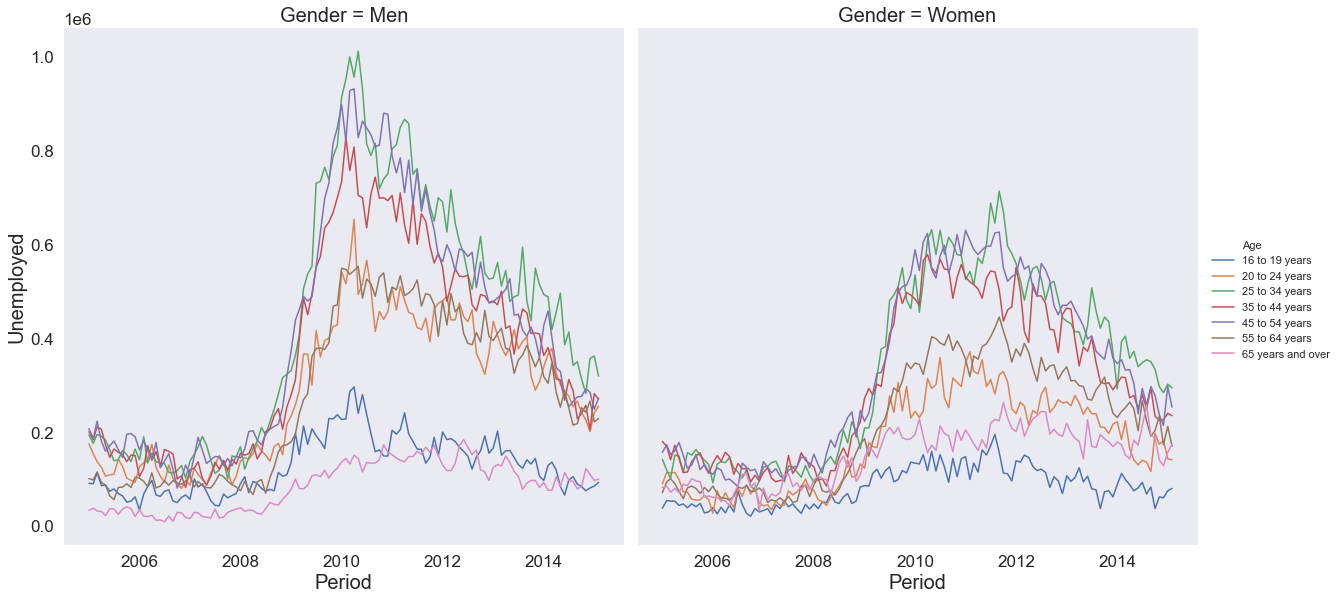

In [30]:
# Combining lineplots using relplot
plt.figure(figsize=(10,10))
sns.set(rc={'xtick.labelsize':17,'ytick.labelsize':17,'axes.labelsize':20  , "axes.grid":False})
sns.relplot(x="Period" , y="Unemployed" , hue="Age" , col="Gender",kind='line', height=8.5, aspect=1 ,data=employment)
plt.show()